In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')
sns.set(font_scale=1.5, rc={'figure.figsize':(16, 10)}, style='whitegrid')

In [3]:
reads_data = pd.read_csv('https://raw.githubusercontent.com/Serfentum/bf_course/master/14.pandas/train.csv')
reads_data.head()

,pos,reads_all,matches,mismatches,deletions,insertions,A,C,T,G,A_fraction,T_fraction,G_fraction,C_fraction
0,279,8045,32,7972,46,8,7911.0,54.0,11.0,NaN,0.983503,0.000815,NaN,0.006896
1,280,8045,7995,48,19,9,NaN,16.0,13.0,19.0,NaN,0.001355,0.002392,0.001914
2,281,8045,7983,50,16,5,NaN,24.0,4.0,24.0,NaN,0.000639,0.002875,0.002310
3,282,8049,7510,505,33,65,105.0,11.0,395.0,NaN,0.012750,0.049096,NaN,0.000919
4,283,8042,7786,155,115,62,46.0,NaN,93.0,31.0,0.004960,0.010992,0.003186,NaN


<AxesSubplot:title={'center':'Distribution histogram'}, xlabel='Position', ylabel='Frequency'>

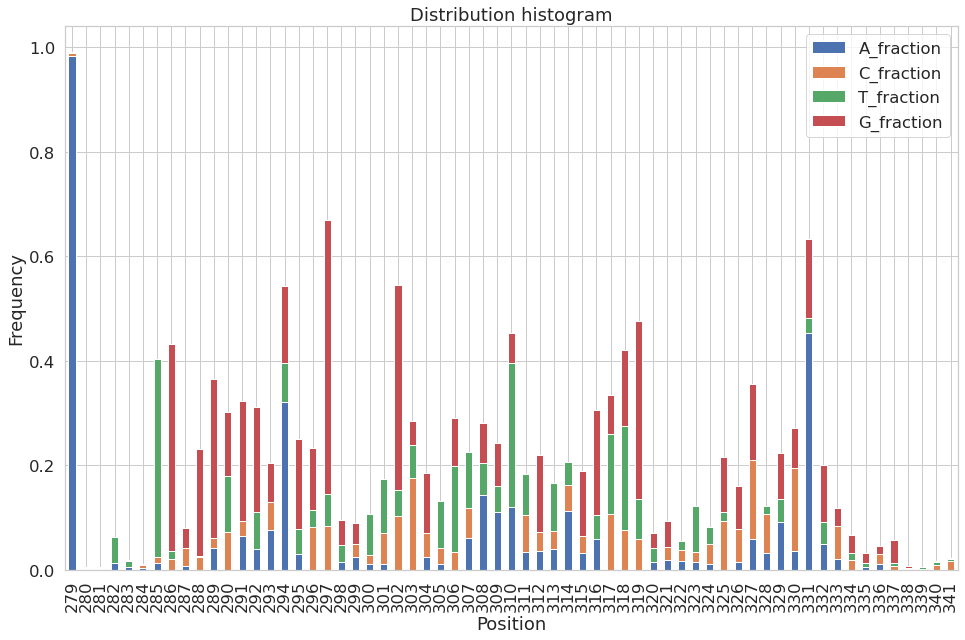

In [4]:
reads_data.set_index('pos') \
          .loc[:, ['A_fraction', 'C_fraction', 'T_fraction', 'G_fraction']] \
          .plot(kind='bar', stacked=True, xlabel='Position', ylabel='Frequency', title='Distribution histogram')

In [5]:
matches_mean = reads_data.matches.mean()
matches_mask = reads_data.matches > matches_mean
reads_data_part = reads_data.loc[matches_mask, ['pos', 'reads_all', 'mismatches', 'deletions', 'insertions']]
reads_data_part.head()

,pos,reads_all,mismatches,deletions,insertions
1,280,8045,48,19,9
2,281,8045,50,16,5
3,282,8049,505,33,65
4,283,8042,155,115,62
5,284,8048,104,864,241


In [6]:
reads_data_part.to_csv('data/train_part.csv')